# **Data Information**

Ambil data dari Kaggle : Bank Customer Segmentation (1M+ Transactions) https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation/data

# **Set Environment**

In [ ]:
# Set Kaggle

# Menginstall kaggle
!pip install -q kaggle
# Membuat direktori
!mkdir ~/.kaggle
# Menyalin kaggle.json ke dir kaggle
!cp kaggle.json ~/.kaggle/
# Meminta izin untuk akses
!chmod 600 ~/.kaggle/kaggle.json

!kaggle -h

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# **Data Loading**

In [ ]:
import zipfile

# # Mengunduh dataset
# !kaggle datasets download -d 'shivamb/bank-customer-segmentation'

import urllib.request

# Mengunduh dataset dari GitHub
data_url = 'https://github.com/fadel11-hub/Belajar-Github/raw/main/bank_transactions.zip'
urllib.request.urlretrieve(data_url, 'bank_transactions.zip')

# Membuat direktori dataset
!mkdir dataset

# Mengekstraksi file zip
nama_file_zip = 'bank_transactions.zip'
nama_folder_tujuan = 'dataset'
dataset_zip = zipfile.ZipFile(nama_file_zip,'r')
dataset_zip.extractall('dataset')
dataset_zip.close()

# Memindahkan files ke direktori dataset
!mv bank_transactions.zip dataset

mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
import pandas as pd

# Memuat dataset dari direktori dataset
df = pd.read_csv('dataset/bank_transactions.csv')

# To stretch head function output to the notebook width
pd.set_option('display.max_columns', None)

# Menampilkan data mentah
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819,2/8/16,143207,25
1,T2,C2142763,4/4/57,M,JHAJJAR,2271,2/8/16,141858,27999
2,T3,C4417068,26/11/96,F,MUMBAI,17874,2/8/16,142712,459
3,T4,C5342380,14/9/73,F,MUMBAI,866503,2/8/16,142714,2060
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714,2/8/16,181156,1762


In [ ]:
# Menampilkan jumlah keseluruhan data mentah
df.shape

(1048567, 9)

In [ ]:
# getting the statistical measures of the data
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1046198,1048567,1048567
mean,115404,157088,1574
std,846485,51262,6575
min,0,0,0
25%,4722,124030,161
50%,16792,164226,459
75%,57657,200010,1200
max,115035495,235959,1560035


# **Data Preprocessing**

In [ ]:
# Memilih kolom-kolom yang relevan untuk digunakan
data = df[['CustAccountBalance', 'TransactionAmount (INR)']]

data.head()

,CustAccountBalance,TransactionAmount (INR)
0,17819,25
1,2271,27999
2,17874,459
3,866503,2060
4,6714,1762


In [ ]:
# Mengganti nama beberapa kolom
data = data.rename(columns={'CustomerID': 'UserID', 'CustAccountBalance': 'Saldo', 'TransactionAmount (INR)': 'Kredit'})

data.head()

,Saldo,Kredit
0,17819,25
1,2271,27999
2,17874,459
3,866503,2060
4,6714,1762


In [ ]:
# Untuk menampilkan informasi mengenai dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Saldo   1046198 non-null  float64
 1   Kredit  1048567 non-null  float64
dtypes: float64(2)
memory usage: 16.0 MB


In [ ]:
data.isnull().sum()

Saldo     2369
Kredit       0
dtype: int64

In [ ]:
mean_saldo = data['Saldo'].mean()
data['Saldo'].fillna(mean_saldo, inplace=True)

In [ ]:
data.isnull().sum()

Saldo     0
Kredit    0
dtype: int64

In [ ]:
# Definisikan kurs pertukaran (contoh: 1 INR = 188,42 IDR)
inr_to_idr_exchange_rate = 187

# Buat kolom baru untuk saldo pengguna dalam IDR
data['Saldo'] = data['Saldo'].astype(float)
data['Saldo'] = data['Saldo'] * inr_to_idr_exchange_rate

# Buat kolom baru untuk jumlah transaksi dalam IDR
data['Kredit'] = data['Kredit'].astype(float)
data['Kredit'] = data['Kredit'] * inr_to_idr_exchange_rate

# Membuat kolom baru 'Arus Kas' yang merupakan selisih antara 'Saldo' dan 'Kredit'
data['Sisa_Saldo'] = data['Saldo'] - data['Kredit']

In [ ]:
data.head()

,Saldo,Kredit,Sisa_Saldo
0,3332162,4675,3327487
1,424619,5235813,-4811194
2,3342520,85833,3256687
3,162036100,385220,161650880
4,1255598,329588,926011


In [ ]:
# pd.options.display.float_format = '{:.0f}'.format
# # pd.options.display.float_format = None

# # Konversi nilai saldo User dari format ilmiah ke float
# data['Saldo'] = data['Saldo'].apply(lambda x: float(f"{x:.10f}"))

In [ ]:
data.head()

,Saldo,Kredit,Sisa_Saldo
0,3332162,4675,3327487
1,424619,5235813,-4811194
2,3342520,85833,3256687
3,162036100,385220,161650880
4,1255598,329588,926011


In [ ]:
data.columns

Index(['Saldo', 'Kredit', 'Sisa_Saldo'], dtype='object')

In [ ]:
# Melabeli pola pengeluaran termasuk Hemat, Normal, atau Boros menggunakan metode kuartil

# Hitung kuartil
q1 = data['Kredit'].quantile(0.25)
q3 = data['Kredit'].quantile(0.75)

# Fungsi untuk menentukan label berdasarkan kuartil
def label_kategori(selisih_saldo):
    if selisih_saldo <= q1:
        return 'Hemat'
    elif q1 < selisih_saldo <= q3:
        return 'Normal'
    else:
        return 'Boros'

# Tambahkan kolom label
data['Label'] = data['Kredit'].apply(label_kategori)

# def label_pengeluaran(saldo_awal, kredit, sisa_saldo):
#     persentase_pengeluaran = (saldo_awal - sisa_saldo) / saldo_awal

#     if persentase_pengeluaran <= 0.2:
#         return 'Hemat'
#     elif 0.2 < persentase_pengeluaran <= 0.3:
#         return 'Normal'
#     else:
#         return 'Boros'

# # Menerapkan fungsi pada DataFrame untuk membuat kolom 'Label Pengeluaran'
# data['Label'] = data.apply(lambda row: label_pengeluaran(row['Saldo'], row['Kredit'], row['Sisa_Saldo']), axis=1)

# # Tampilkan hasil
# data

In [ ]:
data['Label'].value_counts()

Normal    525975
Hemat     262320
Boros     260272
Name: Label, dtype: int64

In [ ]:
# Melihat rentang jumlah transaksi untuk masing-masing label
hemat_range = (data[data['Label'] == 'Hemat']['Kredit'].min(), data[data['Label'] == 'Hemat']['Kredit'].max())
normal_range = (data[data['Label'] == 'Normal']['Kredit'].min(), data[data['Label'] == 'Normal']['Kredit'].max())
boros_range = (data[data['Label'] == 'Boros']['Kredit'].min(), data[data['Label'] == 'Boros']['Kredit'].max())

# Tampilkan hasil
print("Rentang jumlah transaksi untuk label Hemat:", hemat_range)
print("Rentang jumlah transaksi untuk label Normal:", normal_range)
print("Rentang jumlah transaksi untuk label Boros:", boros_range)

Rentang jumlah transaksi untuk label Hemat: (0.0, 30107.0)
Rentang jumlah transaksi untuk label Normal: (30108.87, 224400.0)
Rentang jumlah transaksi untuk label Boros: (224401.87, 291726543.13)


In [ ]:
# Mendapatkan nilai rata-rata jumlah transaksi untuk masing-masing label
mean_hemat = data[data['Label'] == 'Hemat']['Kredit'].mean()
mean_normal = data[data['Label'] == 'Normal']['Kredit'].mean()
mean_boros = data[data['Label'] == 'Boros']['Kredit'].mean()

# Tampilkan hasil
print("Rata-rata jumlah transaksi untuk label Hemat:", mean_hemat)
print("Rata-rata jumlah transaksi untuk label Normal:", mean_normal)
print("Rata-rata jumlah transaksi untuk label Boros:", mean_boros)

Rata-rata jumlah transaksi untuk label Hemat: 13443.931076166515
Rata-rata jumlah transaksi untuk label Normal: 97159.26889933932
Rata-rata jumlah transaksi untuk label Boros: 976166.6385333807


In [ ]:
# Fungsi untuk melakukan pemetaan dari label menjadi angka
def label_to_number(label):
    if label == 'Hemat':
        return 0
    elif label == 'Normal':
        return 1
    elif label == 'Boros':
        return 2
    else:
        return None  # Untuk menangani nilai yang tidak valid

# Menerapkan fungsi pada kolom 'Label Pengeluaran'
data['Label'] = data['Label'].apply(label_to_number)

# Tampilkan hasil encoding
data[['Saldo', 'Kredit', 'Sisa_Saldo', 'Label']]

,Saldo,Kredit,Sisa_Saldo,Label
0,3332162,4675,3327487,0
1,424619,5235813,-4811194,2
2,3342520,85833,3256687,1
3,162036100,385220,161650880,2
4,1255598,329588,926011,2
...,...,...,...,...
1048562,1427781,149413,1278368,1
1048563,5107236,86020,5021216,1
1048564,41468570,143990,41324580,1
1048565,1892042,187000,1705042,1


Hemat = 1
Boros = 0
Normal = 2

# **Explanatory Analysis Data**

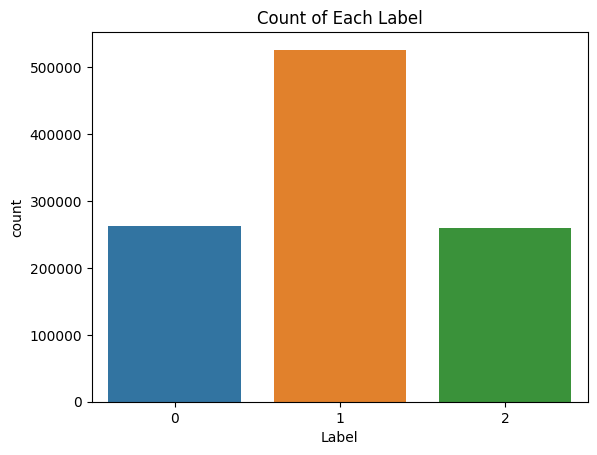

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi countplot untuk data label
sns.countplot(x='Label', data=data)
plt.title('Count of Each Label')
plt.show()

In [ ]:
data['Label'].value_counts()

1    525975
0    262320
2    260272
Name: Label, dtype: int64

# **Data Training**

In [ ]:
data.columns

Index(['Saldo', 'Kredit', 'Sisa_Saldo', 'Label'], dtype='object')

In [ ]:
X = data[['Saldo', 'Kredit', 'Sisa_Saldo']]
Y = data['Label']

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Saldo,Kredit,Sisa_Saldo
899124,23507864,37400,23470464
791184,3781798,9350,3772448
359857,2123996,236462,1887535
696743,4776322,504058,4272264
914819,4720290,56100,4664190
...,...,...,...
259178,743097,28050,715047
365838,9683415,245129,9438286
131932,1172815,93500,1079315
671155,2003833893,74800,2003759093


In [ ]:
y_train

899124    1
791184    0
359857    2
696743    2
914819    1
         ..
259178    0
365838    2
131932    1
671155    1
121958    2
Name: Label, Length: 733996, dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733996 entries, 899124 to 121958
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Saldo       733996 non-null  float64
 1   Kredit      733996 non-null  float64
 2   Sisa_Saldo  733996 non-null  float64
dtypes: float64(3)
memory usage: 22.4 MB


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

input_dim = X_train.shape[1]

# Bangun model RNN sederhana
model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[input_dim], name="lambda1"),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20))

# Kompilasi model
model.compile(loss="sparse_categorical_crossentropy",  # Gunakan categorical_crossentropy untuk one-hot encoded labels
              optimizer="adam",
              metrics=["accuracy"])

# Latih model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[lr_schedule])

Epoch 1/10
16057/16057 [==============================] - 183s 11ms/step - loss: 1.0668 - accuracy: 0.4449 - val_loss: 1.0371 - val_accuracy: 0.5015 - lr: 1.0000e-06
Epoch 2/10
16057/16057 [==============================] - 170s 11ms/step - loss: 1.0366 - accuracy: 0.5008 - val_loss: 1.0358 - val_accuracy: 0.5015 - lr: 1.1220e-06
Epoch 3/10
16057/16057 [==============================] - 170s 11ms/step - loss: 1.0359 - accuracy: 0.5008 - val_loss: 1.0350 - val_accuracy: 0.5015 - lr: 1.2589e-06
Epoch 4/10
16057/16057 [==============================] - 193s 12ms/step - loss: 1.0190 - accuracy: 0.5008 - val_loss: 1.0073 - val_accuracy: 0.5015 - lr: 1.4125e-06
Epoch 5/10
16057/16057 [==============================] - 171s 11ms/step - loss: 0.9864 - accuracy: 0.5018 - val_loss: 0.9563 - val_accuracy: 0.5077 - lr: 1.5849e-06
Epoch 6/10
16057/16057 [==============================] - 189s 12ms/step - loss: 0.9126 - accuracy: 0.5233 - val_loss: 0.8604 - val_accuracy: 0.5888 - lr: 1.7783e-06
Epoc

In [ ]:
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

9831/9831 [==============================] - 37s 4ms/step - loss: 4.0031 - accuracy: 0.2690
Test Loss: 4.003133296966553, Test Accuracy: 0.2689758539199829


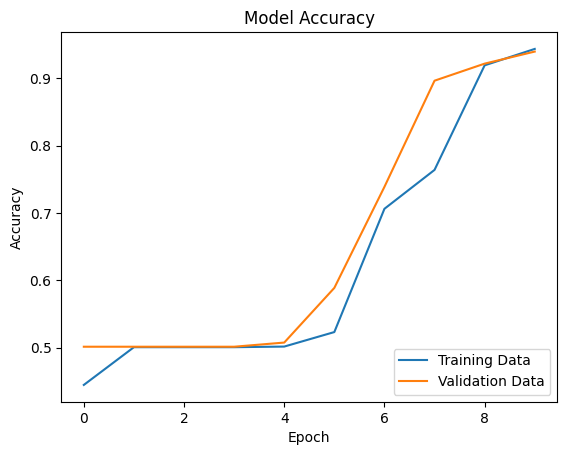

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

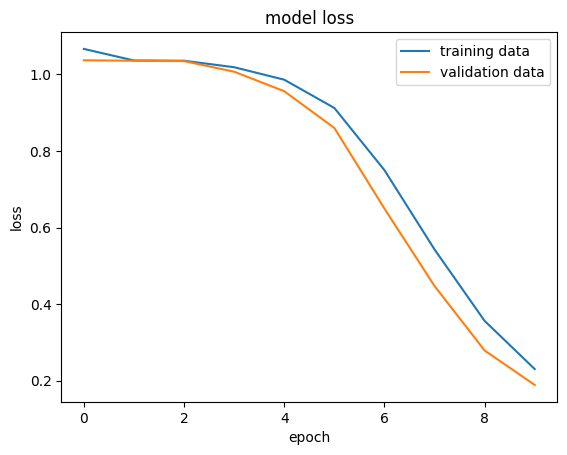

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
X_train.to_csv("preprocessed.csv")

In [ ]:
import pickle

filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('model.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

Saldo
Kredit
Sisa_Saldo


In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# To recheck lamda in tensor input
lambda_input = model.get_layer("lambda1")(X_train)
print(f"Shape of lambda input: {tf.shape(X_train)}")
print(f"Shape of lambda output: {tf.shape(lambda_input)}")

Shape of lambda input: [733996      3]
Shape of lambda output: [733996      3      1]


In [ ]:
# Load the Keras model
model_path = "model.h5"
model = tf.keras.models.load_model(model_path)

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Set the target ops to include TFLite built-ins and select TensorFlow ops
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_new_converter = True

# Convert to TFLite model
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TF Lite model
tflite_path = 'model.tflite'
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)